<h1> <center> <b> Projet de modélisation numérique </b> </center> </h1>

<h2> <b> Introduction </b> </h2> 

<p> Le but de ce projet est de calculer numériquement la courbe de puissance d'une éolienne en fonction de la vitesse du vent incident. Nous allons découper ce projet en plusieurs étapes clés : 

<dt> <A HREF="#Données"> Analyse de données </A> </dt>
<dd> Détermination de l'angle d'incidence optimale et des coefficients $C_p$ et $C_t$ à cet angle </dd>
<dd> Mis en évidence du phénomène de décrochage </dd> 
<dt> <A HREF="#Numérique"> Modèle numérique </A> </dt> 
<dd> Calcul de la puissance </dd>
<dd> Ordres de grandeur </dd>
<dt> <A HREF="#Analytique"> Modèle analytique </A> </dt>
<dd> Calcul de puissance </dd>
<dd> Grandeurs remarquables </dd>
<dt> <A HREF="#Conclusion"> Conclusion </A> </dt>
<dd> Comparaison des modèles </dd>
<dd> Une éolienne pour alimenter un foyer </dd>
<dd> Les limites de notre modèle numérique </dd>

<h2> <b> Modélisation aérodynamique d'une éolienne </b> </h2>

<h3 ID="Données"> I - Analyse de données </h3>
<p> 1 - Détermination de l'angle d'incidence optimale et des coefficients $C_p$ et $C_t$ à cet angle 

Les 2 forces résultantes de la force du vent sont : 

<ol> 
<li>La portance</li> 
<li>La trainée </li>
</ol>

Nous pouvons dans un premier temps, calculer l'expression de leur force à partir de l'équation de Bernoulli :

$$P + \frac{1}{2}\rho v^2 + \rho g h = cste $$

Nous obtenons deux expresssions de la forme :
$$ F_p = \frac{1}{2}\rho V_r^2 S C_p(\alpha) $$
$$ F_t = \frac{1}{2}\rho V_r^2 S C_t(\alpha) $$

Nous avons ainsi 3 inconnues à déterminer pour pouvoir utiliser ces équations. Pour cela, nous utilisons des bases de données de 3 profils de pâles NACA comprenant :
<ul>
<li> L'angle d'incidence $\alpha$ </li>
<li> Le coefficient de portance $C_p$ </li>
<li> Le coefficient de trainée $C_t$ </li>
</ul>

Nous allons donc dans un premier temps analyser ces données pour obtenir l'angle d'incidence optimale ainsi que les 2 coefficients correspondant à cet angle. Les donées étudiées étant discrètes et de forme d'équations polynomiales, nous devons donc utiliser une méthode de régression polynomiale pour rendre ces données exploitable. Pour ce faire, nous avons décidé de comparer 2 méthodes :
<lu>
<li> La méthode PolynomialFeatures de la bibliothèque sklearn </li>
<li> La méthode matricielle appliquée à $C_p$ et $C_t$ </li>
</lu>

Nous remarquons que ces 2 méthodes nous permettent d'obtenir des courbes plutôt proches ce qui renforce la confiance dans les résusltats obtenus. 
</p>




Mounted at /content/gdrive/


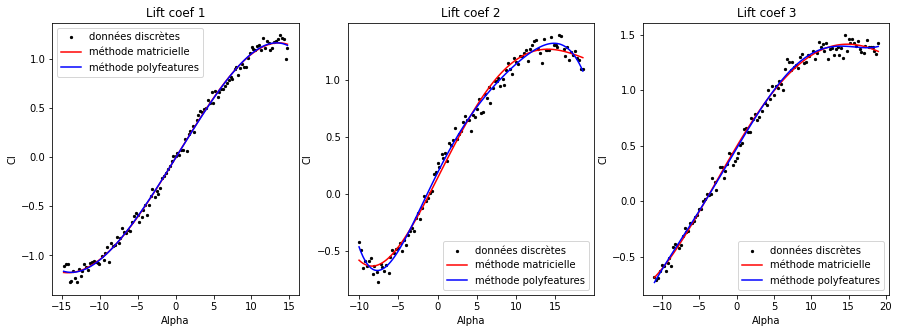

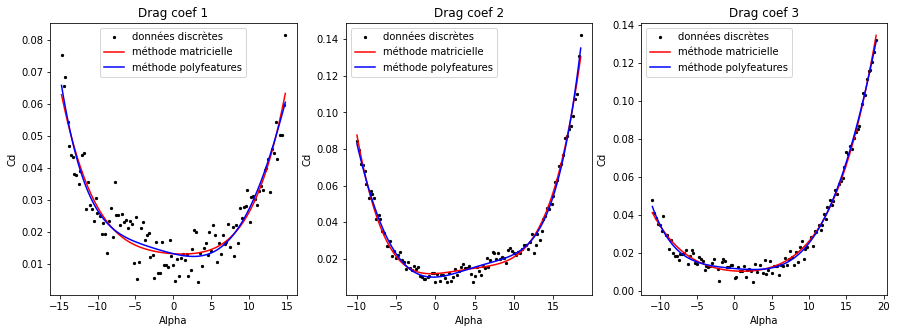

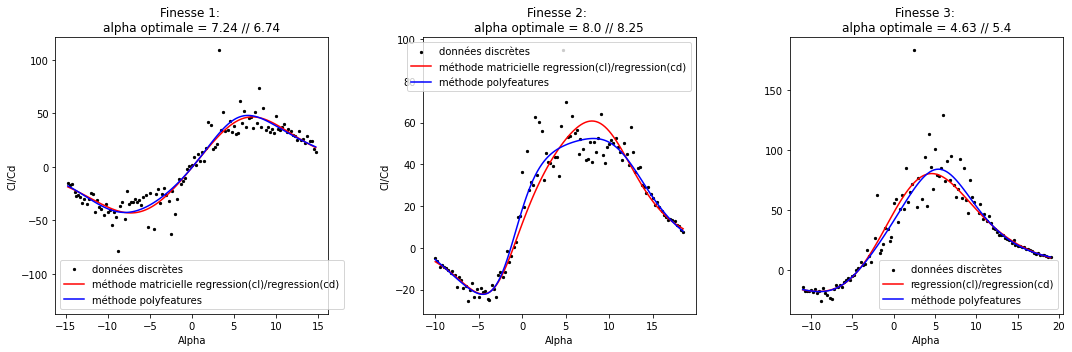

alpha optimale = [6.70972954]
Cl = [0.94648376]
Cd = [0.01583911]


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount = True)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

donnees = np.genfromtxt('/content/gdrive/MyDrive/'+'naca_0012.txt', delimiter=',', names = True)
donnees2 = np.genfromtxt('/content/gdrive/MyDrive/'+'naca_23012.txt', delimiter=',', names = True)
donnees3 = np.genfromtxt('/content/gdrive/MyDrive/'+'naca_4412.txt', delimiter=',', names = True)

alpha=[]
cd=[]
cl=[]
for i in range(len(donnees)):
  alpha.append(donnees[i][0])
  cd.append(donnees[i][1])
  cl.append(donnees[i][2])

alpha=np.array(alpha)
cd=np.array(cd)
cl=np.array(cl)

alpha2=[]
cd2=[]
cl2=[]
for i in range(len(donnees2)):
  alpha2.append(donnees2[i][0])
  cd2.append(donnees2[i][1])
  cl2.append(donnees2[i][2])

alpha2=np.array(alpha2)
cd2=np.array(cd2)
cl2=np.array(cl2)

alpha3=[]
cd3=[]
cl3=[]
for i in range(len(donnees3)):
  alpha3.append(donnees3[i][0])
  cd3.append(donnees3[i][1])
  cl3.append(donnees3[i][2])

alpha3=np.array(alpha3)
cd3=np.array(cd3)
cl3=np.array(cl3)

def puissance(a, b):
  return np.power(a, b)

def polynomial_regression(X, y, degree):
    x_range = np.linspace(min(X), max(X), len(X))
    X=X.reshape(-1,1)
    for i in range(2, degree + 1):
        X = np.c_[X, puissance(X[:, 0],i)]

    # Ajout d'une colonne de 1 pour le terme constant
    X = np.c_[np.ones(X.shape[0]), X]

    # Calcul des coefficients de régression
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    ans = 0
    for i in range(degree + 1):
        ans += beta[i]*puissance(x_range, i)
        i += 1
    return ans

def afficher_polynomial_regression(alpha, cl, cd, alpha2, cl2, cd2, alpha3, cl3, cd3, dg):
    
    # Calcul de la régression polynomiale avec la méthode matricielle
    x_range = np.linspace(min(alpha), max(alpha), 119)
    x_range2 = np.linspace(min(alpha2), max(alpha2), 115)
    x_range3 = np.linspace(min(alpha3), max(alpha3), 118)

    y_range_cl = polynomial_regression(alpha, cl, dg)
    y_range_cl_2 = polynomial_regression(alpha2, cl2, dg)
    y_range_cl_3 = polynomial_regression(alpha3, cl3, dg)

    y_range_cd = polynomial_regression(alpha, cd, dg)
    y_range_cd_2 = polynomial_regression(alpha2, cd2, dg)
    y_range_cd_3 = polynomial_regression(alpha3, cd3, dg)

    # Trouver l'indice de la valeur maximale dans chaque tableau
    imax_ = np.argmax(y_range_cl / y_range_cd)
    imax2_ = np.argmax(y_range_cl_2 / y_range_cd_2)
    imax3_ = np.argmax(y_range_cl_3 / y_range_cd_3)

    # Calcul de la régression polynomiale avec la méthode polyfeatures
    cdd, cdd2, cdd3 = cd.reshape(119, 1), cd2.reshape(115, 1), cd3.reshape(118, 1)
    cll, cll2, cll3 = cl.reshape(119, 1), cl2.reshape(115, 1), cl3.reshape(118, 1)
    alphaa, alphaa2, alphaa3 = alpha.reshape(119, 1), alpha2.reshape(115, 1), alpha3.reshape(118, 1)
    finesse, finesse2, finesse3 = cll/cdd, cll2/cdd2, cll3/cdd3

    poly_features = PolynomialFeatures(degree=5, include_bias=False)

    X_poly_cdd = poly_features.fit_transform(alphaa)
    X_poly_cll = poly_features.fit_transform(alphaa)
    X_poly_cdd2 = poly_features.fit_transform(alphaa2)
    X_poly_cll2 = poly_features.fit_transform(alphaa2)
    X_poly_cdd3 = poly_features.fit_transform(alphaa3)
    X_poly_cll3 = poly_features.fit_transform(alphaa3)

    reg_cdd = LinearRegression()
    reg_cdd.fit(X_poly_cdd, cdd)
    X_vals_cdd = x_range.reshape(-1, 1)
    X_vals_poly_cdd = poly_features.transform(X_vals_cdd)
    y_vals_cdd = reg_cdd.predict(X_vals_poly_cdd)

    reg_cll = LinearRegression()
    reg_cll.fit(X_poly_cll, cll)
    X_vals_cll = x_range.reshape(-1, 1)
    X_vals_poly_cll = poly_features.transform(X_vals_cll)
    y_vals_cll = reg_cll.predict(X_vals_poly_cll)

    reg_cdd2 = LinearRegression()
    reg_cdd2.fit(X_poly_cdd2, cdd2)
    X_vals_cdd2 = x_range2.reshape(-1, 1)
    X_vals_poly_cdd2 = poly_features.transform(X_vals_cdd2)
    y_vals_cdd2 = reg_cdd2.predict(X_vals_poly_cdd2)

    reg_cll2 = LinearRegression()
    reg_cll2.fit(X_poly_cll2, cll2)
    X_vals_cll2 = x_range2.reshape(-1, 1)
    X_vals_poly_cll2 = poly_features.transform(X_vals_cll2)
    y_vals_cll2 = reg_cll2.predict(X_vals_poly_cll2)

    reg_cdd3 = LinearRegression()
    reg_cdd3.fit(X_poly_cdd3, cdd3)
    X_vals_cdd3 = x_range3.reshape(-1, 1)
    X_vals_poly_cdd3 = poly_features.transform(X_vals_cdd3)
    y_vals_cdd3 = reg_cdd3.predict(X_vals_poly_cdd3)

    reg_cll3 = LinearRegression()
    reg_cll3.fit(X_poly_cll3, cll3)
    X_vals_cll3 = x_range3.reshape(-1, 1)
    X_vals_poly_cll3 = poly_features.transform(X_vals_cll3)
    y_vals_cll3 = reg_cll3.predict(X_vals_poly_cll3)

    y_cl_cd_poly = np.array(y_vals_cll / y_vals_cdd)
    y_cl_cd2_poly = np.array(y_vals_cll2 / y_vals_cdd2)
    y_cl_cd3_poly = np.array(y_vals_cll3 / y_vals_cdd3)

    # Trouver l'indice de la valeur maximale dans chaque tableau
    indice_max = np.argmax(y_cl_cd_poly)
    indice_max2 = np.argmax(y_cl_cd2_poly)
    indice_max3 = np.argmax(y_cl_cd3_poly)

    # Affichage des données et de leurs régression polynomiale pour chaque grandeur aero
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].scatter(alpha, cl, s=5, color="black", label="données discrètes")
    axs[0].set_title('Lift coef 1')
    axs[0].set_xlabel('Alpha')
    axs[0].set_ylabel('Cl')
    axs[0].plot(x_range, y_range_cl, 'r', label='méthode matricielle')
    axs[0].plot(X_vals_cll, y_vals_cll, color='b', label='méthode polyfeatures')
    axs[0].legend()

    axs[1].scatter(alpha2, cl2, s=5, color="black", label="données discrètes")
    axs[1].set_title('Lift coef 2')
    axs[1].set_xlabel('Alpha')
    axs[1].set_ylabel('Cl')
    axs[1].plot(x_range2, y_range_cl_2, 'r', label='méthode matricielle')
    axs[1].plot(X_vals_cll2, y_vals_cll2, color='b', label='méthode polyfeatures')
    axs[1].legend()

    axs[2].scatter(alpha3, cl3, s=5, color="black", label="données discrètes")
    axs[2].set_title('Lift coef 3')
    axs[2].set_xlabel('Alpha')
    axs[2].set_ylabel('Cl')
    axs[2].plot(x_range3, y_range_cl_3, 'r', label='méthode matricielle')
    axs[2].plot(X_vals_cll3, y_vals_cll3, color='b', label='méthode polyfeatures')
    axs[2].legend()

    fig2, axs2 = plt.subplots(1, 3, figsize=(15, 5))
    axs2[0].scatter(alpha, cd, s=5, color="black", label="données discrètes")
    axs2[0].set_title('Drag coef 1')
    axs2[0].set_xlabel('Alpha')
    axs2[0].set_ylabel('Cd')
    axs2[0].plot(x_range, y_range_cd, 'r', label='méthode matricielle')
    axs2[0].plot(X_vals_cdd, y_vals_cdd, color='b', label='méthode polyfeatures')
    axs2[0].legend()

    axs2[1].scatter(alpha2, cd2, s=5, color="black", label="données discrètes")
    axs2[1].set_title('Drag coef 2')
    axs2[1].set_xlabel('Alpha')
    axs2[1].set_ylabel('Cd')
    axs2[1].plot(x_range2, y_range_cd_2, 'r', label='méthode matricielle')
    axs2[1].plot(X_vals_cdd2, y_vals_cdd2, color='b', label='méthode polyfeatures')
    axs2[1].legend()

    axs2[2].scatter(alpha3, cd3, s=5, color="black", label="données discrètes")
    axs2[2].set_title('Drag coef 3')
    axs2[2].set_xlabel('Alpha')
    axs2[2].set_ylabel('Cd')
    axs2[2].plot(x_range3, y_range_cd_3, 'r', label='méthode matricielle')
    axs2[2].plot(X_vals_cdd3, y_vals_cdd3, color='b', label='méthode polyfeatures')
    axs2[2].legend()

    # Affichage de la finesse et de l'angle de finesse optimale
    fig3, axs3 = plt.subplots(1, 3, figsize=(15, 5))
    axs3[0].scatter(alpha, cl/cd, s=5, color='black', label="données discrètes")
    axs3[0].set_title("Finesse 1: "+'\n'+"alpha optimale = "+str(round(x_range[imax_], 2))+" // "+str(round(float(X_vals_cll[indice_max]), 2)))
    axs3[0].set_xlabel('Alpha')
    axs3[0].set_ylabel('Cl/Cd')
    axs3[0].plot(x_range, y_range_cl / y_range_cd, 'r', label='méthode matricielle regression(cl)/regression(cd)')
    axs3[0].plot(X_vals_cll, y_vals_cll / y_vals_cdd, 'b', label='méthode polyfeatures')
    axs3[0].legend()

    axs3[1].scatter(alpha2, cl2/cd2, s=5, color='black', label="données discrètes")
    axs3[1].set_title("Finesse 2: "+'\n'+"alpha optimale = "+str(round(x_range2[imax2_], 2))+" // "+str(round(float(X_vals_cll2[indice_max2]), 2)))
    axs3[1].set_xlabel('Alpha')
    axs3[1].set_ylabel('Cl/Cd')
    axs3[1].plot(x_range2, y_range_cl_2 / y_range_cd_2, 'r', label='méthode matricielle regression(cl)/regression(cd)')
    axs3[1].plot(X_vals_cll2, y_vals_cll2 / y_vals_cdd2, 'b', label='méthode polyfeatures')
    axs3[1].legend()

    axs3[2].scatter(alpha3, cl3/cd3, s=5, color="black", label="données discrètes")
    axs3[2].set_title("Finesse 3: "+'\n'+"alpha optimale = "+str(round(x_range3[imax3_], 2))+" // "+str(round(float(X_vals_cll3[indice_max3]), 2)))
    axs3[2].set_xlabel('Alpha')
    axs3[2].plot(x_range3, y_range_cl_3 / y_range_cd_3, 'r', label='regression(cl)/regression(cd)')
    axs3[2].plot(X_vals_cll3, y_vals_cll3 / y_vals_cdd3, 'b', label='méthode polyfeatures')
    axs3[2].legend()
    
    plt.tight_layout()
    plt.show()
    alpha_opti = (X_vals_cll[indice_max] + x_range[imax_] + X_vals_cll2[indice_max2] + x_range2[imax2_] + X_vals_cll3[indice_max3] + x_range3[imax3_]) / 6
    s = (y_vals_cll[indice_max] + y_range_cl[imax_] + y_vals_cll2[indice_max2] + y_range_cl_2[imax2_] + y_vals_cll3[indice_max3] + y_range_cl_3[imax3_]) / 6
    s2 = (y_vals_cdd[indice_max] + y_range_cd[imax_] + y_vals_cdd2[indice_max2] + y_range_cd_2[imax2_] + y_vals_cdd3[indice_max3] + y_range_cd_3[imax3_]) / 6
    print("alpha optimale = " + str(alpha_opti) + '\n' + "Cl = " + str(s) +'\n'+ "Cd = " + str(s2))

afficher_polynomial_regression(alpha, cl, cd, alpha2, cl2, cd2, alpha3, cl3, cd3, 4)


<p> Tentative d'amélioration du code pour obtenir un programme moins lourd et plus lisible </p>

In [ ]:
# def load_data(file_name):
#   data = np.genfromtxt('/content/gdrive/MyDrive/' + file_name, delimiter=',', names = True)
#   alpha = data['alpha']
#   cd = data['Cd']
#   cl = data['Cl']
#   return alpha, cd, cl

# data1 = load_data('naca_0012.txt')
# data2 = load_data('naca_23012.txt')
# data3 = load_data('naca_4412.txt')

# def polyfeatures(data, dg):
#   x_range = np.linspace(min(data['alpha']), max(data['alpha']), len(data['alpha']))
#   alpha = data['alpha'].reshape(len(data['alpha']), 1)
#   cd = data['Cd'].reshape(len(data['Cd']), 1)
#   cl = data['Cl'].reshape(len(data['Cl']), 1)
  
#   poly_features = PolynomialFeatures(degree=dg, include_bias=False)
#   X_poly_cd = poly_features.fit_transform(alpha)
#   reg_cd = LinearRegression()
#   reg_cd.fit(X_poly_cd, cd)
#   X_vals_cd = x_range.reshape(-1, 1)
#   X_vals_poly_cd = poly_features.transform(X_vals_cd)
#   y_vals_cd = reg_cd.predict(X_vals_poly_cd)
  
#   X_poly_cl = poly_features.fit_transform(alpha)
#   reg_cl = LinearRegression()
#   reg_cl.fit(X_poly_cl, cl)
#   X_vals_cl = x_range.reshape(-1, 1)
#   X_vals_poly_cl = poly_features.transform(X_vals_cl)
#   y_vals_cl = reg_cl.predict(X_vals_poly_cl)

#   return X_vals_cd, y_vals_cd, X_vals_cl, y_vals_cl

<h3> 2 - Mise en évidence du phénomène de décrochage </h3>

<p> Le décrochage est un phénomène qui peut se produire sur les pales d'une éolienne lorsque le vent souffle à des vitesses élevées. Ce phénomène se produit lorsque le vent frappe la face convexe de la pale, créant une zone de basse pression sur cette face et une zone de haute pression sur la face concave de la pale.

Lorsque la différence de pression entre les deux faces de la pale devient suffisamment importante, le flux d'air ne peut plus suivre la courbure de la pale et se détache de la surface de la pale. Cela crée une zone de turbulence qui réduit la portance de la pale et donc la quantité d'énergie que l'éolienne peut produire.

Pour éviter le décrochage, les pales d'une éolienne sont conçues avec une forme aérodynamique qui permet de réduire les turbulences et de maintenir le flux d'air collé à la surface de la pale même à des vitesses élevées. Les pales peuvent également être équipées de volets mobiles pour réduire la force exercée sur les pales et ainsi éviter le décrochage. De plus, au-delà d'une certaine vitesse de vent, l'éolienne cesse de fonctionner. 

Le décrochage peut causer des dommages à la structure de l'éolienne et augmenter le risque d'accidents. Lorsque l'éolienne décroche, elle peut perdre son équilibre et commencer à osciller de manière incontrôlable. Cela peut entraîner des tensions excessives sur les pales de l'éolienne et sur les autres composants de la structure, ce qui peut causer des dommages importants. 

source :
<a href="http://xn--drmstrre-64ad.dk/wp-content/wind/miller/windpower%20web/fr/tour/wtrb/stall.htm#:~:text=Le%20d%C3%A9crochage%20peut%20avoir%20lieu%20si%20la%20surface,l%27extrados%2C%20m%C3%AAme%20lorsque%20l%27angle%20d%27attaque%20est%20assez%20petit"> Décrochage d'une pâle d'éolienne/d'avion </a>

</p>


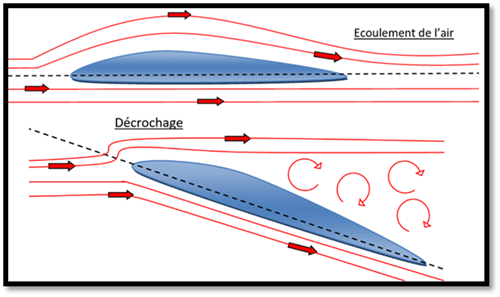

Mounted at /content/gdrive/


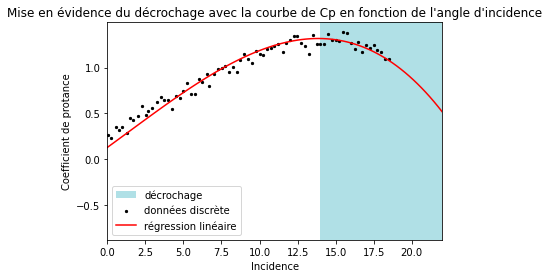

In [ ]:
from ast import Num
from google.colab import drive
drive.mount('/content/gdrive/', force_remount = True)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

donnees2 = np.genfromtxt ('/content/gdrive/MyDrive/'+'naca_23012.txt', delimiter=',', names = True)

alpha=[]
cl=[]
for i in range(len(donnees2)):
  alpha.append(donnees2[i][0])
  cl.append(donnees2[i][2])

x=np.array(alpha)
y2=np.array(cl)

def puissance(x, y):
  return np.power(x, y)

# regression polynomiale
def polynomial_regression(X, y, degree):
    X=X.reshape(-1,1)
    for i in range(2, degree + 1):
        X = np.c_[X, puissance(X[:, 0],i)]

    # Ajout d'une colonne de 1 pour le terme constant
    X = np.c_[np.ones(X.shape[0]), X]

    # Calcul des coefficients de régression
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

beta = polynomial_regression(x, y2, 3)
x_range = np.linspace(min(alpha), 22, 119)
y_range = beta[0] + beta[1]*x_range + beta[2]*puissance(x_range, 2) + beta[3]*puissance(x_range, 3)

# Affichage du décrochage
plt.xlabel('Incidence')
plt.ylabel('Coefficient de protance')
plt.title("Mise en évidence du décrochage avec la courbe de Cp en fonction de l'angle d'incidence")
plt.xlim(0, 22)
ax = plt.gca()
ax.axvspan(14, 22, facecolor='powderblue', label='décrochage')
plt.scatter(x, y2, s=5, color='black', label='données discrète')
plt.plot(x_range, y_range, color='r', label='régression linéaire')
plt.legend()
plt.show()

<h2 ID="Numérique"> II - Modèle numérique </h2>

<h3> 1 - Calcul de la puissance </h3>

<p> Pour calculer la puissance porduite par une éolienne, nous partons de l'expression des forces de portance et de trainée introduites précédemment :</p>

$$ F_p = \frac{1}{2}\rho V_r^2 S C_p(\alpha) $$
$$ F_t = \frac{1}{2}\rho V_r^2 S C_t(\alpha) $$

</p> Nous projetons ensuite ces forces sur l'axe $\vec{e_{\theta}}$ et nous calculons ensuite la résultante de ces 2 forces. </p>

$$ F_{p, \vec{e_{theta}}} = F_p\sin(\alpha) $$
$$ F_{t, \vec{e_{theta}}} = F_t\cos(\alpha) $$

Avec $V_r$ la vitesse relative et S la surface balayé par l'éolienne soit : $S = \pi \cdot rayon_{eolienne}^2$

On considère que $\Phi(r) \simeq 0$, ainsi, d'où la relation : $\alpha\simeq\beta(r)$.

La résultante correspond simplement à $F_{p, \vec{e_{theta}}} - F_{t, \vec{e_{theta}}}$.

<p> Ensuite, nous calculons le couple résultant de cette force. Pour ce faire, nous multipliant la résultante des forces aérodynamiques par le point d'application situé au centre de la pâle.</p>

Finalement, pour obtenir la puissance nominale fournit par l'éolienne, il nous suffit de multiplier la couple par la vitesse angulaire de l'éolienne. </p> 

<p>Nous introduisons également un facteur correspondant à la limite de Betz. En effet, si nous tentions d'extraire toute l'énergie contenue dans le vent, l'air continuerait son chemin à une vitesse nulle. Le résultat serait donc qu'aucune énergie ne serait extraite du vent d'après la loi de Bernoulli.
L'autre cas extrême serait que le vent passerait à travers le tube sans aucune perturbation, mais avec le même résultat : l'énergie extraite serait également nulle.
Nous pouvons donc conclure qu'il doit y avoir une manière de freiner le vent qui se trouve entre ces deux extrémités et qui permette de façon bien plus efficace de transformer l'énergie du vent en énergie mécanique. Cette valeur est égale à $\frac{16}{27}$. </p>

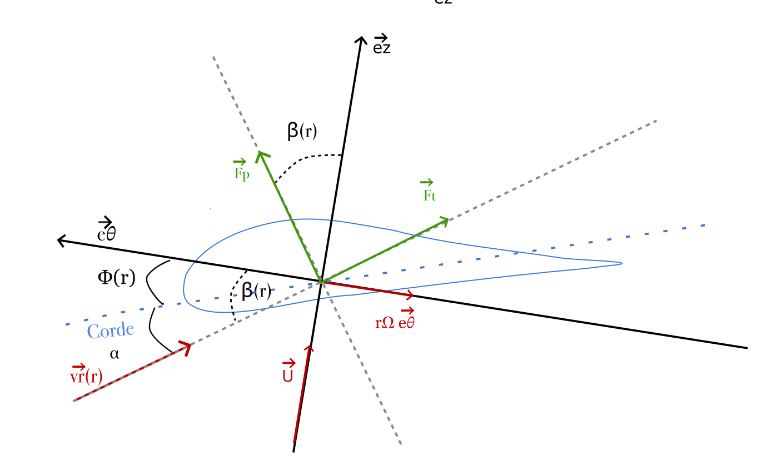

<p>
<ul>
<li> $\beta(r)$ correspond à l'angle d'inclinaison de l'éolienne par rapport au sens du vent </li>
<li> $\alpha$ correspond à l'angle d'attaque de la pâle </li>
<li> $\vec{U}$ correspond à la vitesse du vent </li>
<li> $\vec{V_r}(r)$ correspond à la vitesse relative du vent </li>
<li> $r\Omega \vec{e_{\theta}}$ correspond à la vitesse de la pâle en $m.s^{-1}$ </li>
<li> $F_p$ et $F_t$ sont les forces de poussée et de trainée </li>
</ul>
</p>  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def force(U, cl, cd, rho, alpha, taille):
  
  Vr = 6.25 * U * np.sin(np.deg2rad(alpha)) 
  
  Fl = 0.5 * rho * np.power(Vr, 2) * np.pi * taille**2 * cl
  Fd = 0.5 * rho * np.power(Vr, 2) * np.pi * taille**2 * cd
  
  Fl = Fl * np.sin(np.deg2rad(alpha)) 
  Fd = - Fd * np.cos(np.deg2rad(alpha))
  
  Resultante = Fl - Fd
  return Resultante

def couple(taille, U):
  strenght = force(U, 0.95, 0.016, 1.225, 6.7, taille)
  torque = strenght * taille / 2
  return torque

def puissance_nominale(taille, omega, U):
  torque = couple(taille, U)
  betz = 16/27
  return torque * omega * betz


<p> Démonstration de l'expression de $V_r$ :

$V_r$ correspondant à la somme en terme de vecteur de U et $r\Omega$.

Pour calculer $r\Omega$, nous utilisons la formule suivante :

$$r\Omega = P_{cercle} * \frac{N}{60}$$

Avec: 

$P_{cercle}$ le périmètre du cercle parcouru par les pâles

N le nombre de tours par minute

Soit : $P_{cercle} = 2\pi r$ et N = $\frac{2000}{D}$

Ainsi : $$r\Omega = \frac{2000\pi r}{60r} \simeq 105m.s^{-1}$$

Or U prend des valeurs comprises entre 0 et 20 m/s. Comme on a $r\Omega$ >> $U$, on peut écrire : $r\Omega \simeq 5.25 U$ d'où 
$$\lVert Vr \rVert = \lVert r\Omega \rVert + \lVert U \rVert = U (1 + 5.25) =  6.25U $$ 

La formule sur N à été obtenu à l'aide des données de cette page :
<a href="https://eolienne.ooreka.fr/astuce/voir/376182/hauteur-d-une-eolienne"> Vitesse des pâles en tour/min </a>

<ul>
<li> 2000 tour/mn pour un diamètre d'1 m </li>
<li> 1000 tour/mn pour un diamètre de 2 m </li>
<li> 200 tour/mn pour un diamètre de 10 m </li>
<li> 40 tour/mn pour un diamètre de 50 m </li>
</ul>

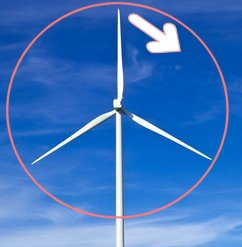

<h3> 2 - Ordre de grandeur </h2>

<p> Puissance d'une éolienne avec des pâles d'un rayon de 50 centimètres et une vitesse angulaire de 210 rad/s. La valeur théorique est proche de 400 W. Nous obtenons une puissance nominale de 150 W avec notre modèle.

Les vitesses angulaires selon la taille des pâles de l'éolienne ont été trouvées sur : <a href="https://eolienne.ooreka.fr/astuce/voir/376182/hauteur-d-une-eolienne"> Vitesse angulaire d'une éolienne <a> </p>

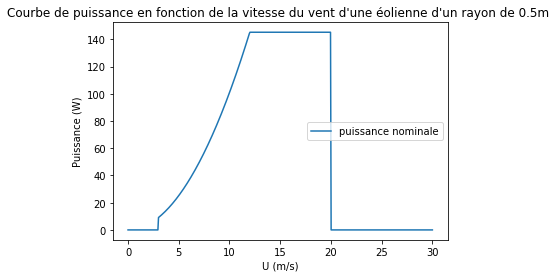

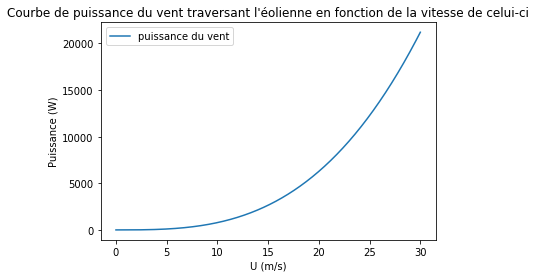

In [ ]:
vitesse_vent = np.linspace(0, 30, 500)

cut_in_speed = 3
cut_speed = 12
cut_out_speed = 20
puissances = []
longueur_pale = 0.5
omega = 210

for v in vitesse_vent :
    if v < cut_in_speed:
        puissances.append(0)
    elif cut_in_speed <= v < cut_speed:
        puissances.append(puissance_nominale(longueur_pale, omega, v))
    elif cut_speed <= v < cut_out_speed:
        puissances.append(puissance_nominale(longueur_pale, omega, cut_speed))
    elif v >= cut_out_speed:
        puissances.append(0)

puissance_vent = np.pi*longueur_pale**2 * vitesse_vent**3

plt.figure()
plt.plot(vitesse_vent, puissances, label="puissance nominale")
plt.title("Courbe de puissance en fonction de la vitesse du vent d'une éolienne d'un rayon de 0.5m ")
plt.xlabel('U (m/s)')
plt.ylabel('Puissance (W)')
plt.legend()

plt.figure()
plt.title("Courbe de puissance du vent traversant l'éolienne en fonction de la vitesse de celui-ci")
plt.plot(vitesse_vent, puissance_vent, label="puissance du vent")
plt.xlabel('U (m/s)')
plt.ylabel('Puissance (W)')
plt.legend()
plt.show()

<p> Puissance d'une éolienne avec des pâles d'un rayon de 50m et d'une vitesse angulaire de 4 rad/s. La valeur théorique est de 3 MW, notre programme affiche une puissance nominale de l'ordre de 2.8 MW. </p>

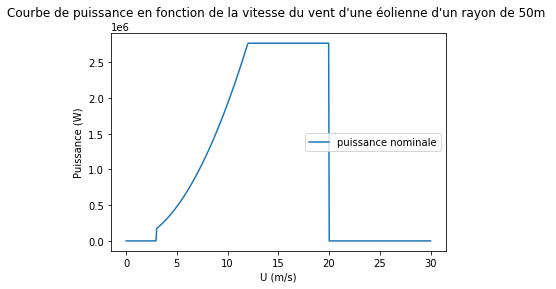

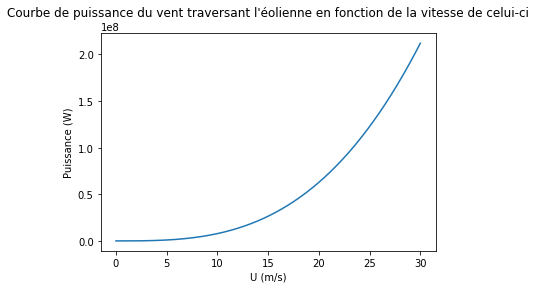

In [ ]:
vitesse_vent2 = np.linspace(0, 30, 500)

cut_in_speed = 3
cut_speed = 12
cut_out_speed = 20
puissances2 = []
longueur_pale = 50
omega = 4

for v in vitesse_vent2 :
    if v < cut_in_speed:
        puissances2.append(0)
    elif cut_in_speed <= v < cut_speed:
        puissances2.append(puissance_nominale(longueur_pale, omega, v))
    elif cut_speed <= v < cut_out_speed:
        puissances2.append(puissance_nominale(longueur_pale, omega, cut_speed))
    elif v >= cut_out_speed:
        puissances2.append(0)

puissance_vent = np.pi*longueur_pale**2 * vitesse_vent2**3

plt.figure()
plt.plot(vitesse_vent2, puissances2, label="puissance nominale")
plt.title("Courbe de puissance en fonction de la vitesse du vent d'une éolienne d'un rayon de 50m ")
plt.xlabel('U (m/s)')
plt.ylabel('Puissance (W)')
plt.legend()

plt.figure()
plt.plot(vitesse_vent2, puissance_vent, label="puissance du vent")
plt.title("Courbe de puissance du vent traversant l'éolienne en fonction de la vitesse de celui-ci")
plt.xlabel('U (m/s)')
plt.ylabel('Puissance (W)')
plt.show()

<p> La courbe de puissance que l'on affiche correspond bien à une courbe standard de puissance. En effet, l'éolienne ne se met en marche qu'à partir une certaine valeur de vitesse de vent (entre 3 et 4 m/s selon les modèles). De plus, dépasser 12 m/s, la puissance stagne. Puis, au dela de 20 m/s, l'éolienne s'arrête et ne fournit plus de puissance. Voici la forme de la courbe attendue : 
</p>

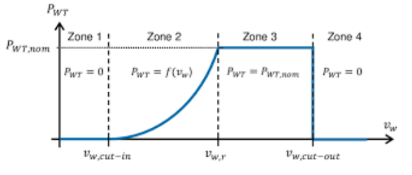

<h2 ID="Analytique"> III - Méthode analytique </h2>

<h3> 1 - Calcul de puissance </h3>

<p> D'après l'expression de l'énergie cinétique :

$E_c = \frac{1}{2} m v^2$

et de la masse de l'air :

$m = \rho V$

On peut obtenir la fromule suivante :

$$P = E_{c,s} = \frac{1}{2} \cdot \rho_0 \cdot vS \cdot v^2$$

Avec :

- $\rho_0$ la masse volumique de l'air ($kg.m^{-3}$)

- $vS$ le débit voumique d'air ($m^3.s^{-1}$)

- $v$ la vitesse de l'air traversant le système ($m.s^{-1}$)

La puissance récupérable est alors :

$$P_{cinetique} = \frac{1}{2} \rho a S V_{turbine}^3$$

Avec :

- $V_{turbine} = aV_{fluide}$

- S la surface projeté

La puissance maximale récupérable est donc :

$$P_{recuperable} = Betz \cdot P_{cinetique} = \frac{16}{27} \frac{\rho S v^3}{2}$$

Courbe de puissance d'une éolienne d'un rayon égale à 50 centimètre :

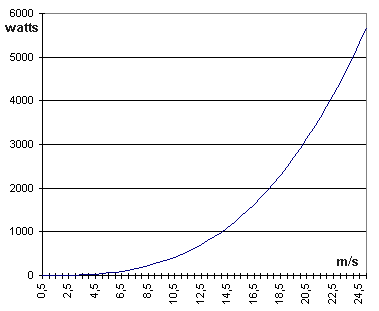

<p> Sachant que la puissance est bloquée au dela de 12m/s, on trouve une puissance nominale maximale de l'ordre de 500 W. </p> 

<h3> 2 - Grandeurs remarquables </h3>

<p> Quelques grandeurs de puissance pour des tailles d'éoliennes caractéristiques </p>

<ul>
<li> 400 W pour r=50cm </li>
<li> 1.6 kW pour r = 1m </li>
<li> 2.5 kW pour r = 2.5m </li>
<li> 300 kW pour r = 15m </li>
<li> 3 MW pour r = 50m </li>
<li> 8 MW pour r = 75m </li>
</ul> 

sources : 

<a href="https://eolienne.ooreka.fr/astuce/voir/376182/hauteur-d-une-eolienne"> Hauteur d'une éolienne </a>

<a href="https://eolienne.ooreka.fr/astuce/voir/352953/puissance-eolienne#:~:text=Petites%20%C3%A9oliennes%20%3A%20diam%C3%A8tre%20de%20rotor%20de%202,125%20m%20%3A%20350%20kW%20%C3%A0%205%20MW"> Puissance d'une éolienne </a>

<p> Affichage de la courbe de puissance en fonction de la taille des pâles. Notre courbe suit bien la courbe théorique attendu. Nos valeurs sont cependant légèrement minimisées. </p>

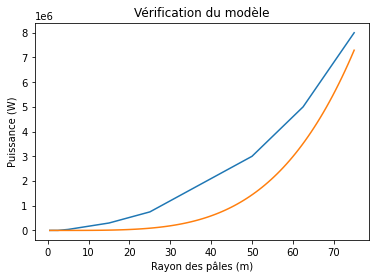

In [ ]:
L = [0.5, 1, 2.5, 5,  15, 25, 50, 62.5, 75]
P = [400, 1600, 1000, 40000, 300000, 750000, 3000000, 5000000, 8000000]
plt.plot(L, P)

R = np.linspace(0.5, 75, 100)
Puissance_rayon = []

for r in R:
  Puissance_rayon.append(puissance_nominale(r, r/0.24, 12)/100)

plt.plot(R, Puissance_rayon)
plt.title("Vérification du modèle")
plt.xlabel("Rayon des pâles (m)")
plt.ylabel("Puissance (W)")
plt.show()

<h2 ID="Conclusion"> IV - Conclusion </h2>

<h3> 1 - Comparaison des modèles </h3>

Comparaison des valeurs de puissance pour une éolienne domestique ayant un rotor d'un rayon de 50 centimètres :
<ul>
<li>D'après le modèle numérique, nous trouvons une valeur de puissance maximale de l'ordre de 150W. </li>
<li> D'après le modèle analytique, nous trouvons une valeur de puissance de l'ordre de 500W. </li>
<li> D'après des données constructeurs trouvées en ligne, la puissance est de l'ordre de 400W. </li>

La puissance obtenus par notre modèle numérique est assez proche des valeurs théoriques. En effet, il est difficile de trouvé des valeurs en lignes puisque celles ci sont tout le temps différentes selon si l'on parle de puissance nominale, de puissance récuperable où si la taille correspond au diamètre ou au rayon du rotor. Ces paramètres ne sont pas toujours clairement détaillés ainsi, il est difficile de trouver une valeure précise de puissance à obtenir. Nous considérerons donc nos résultats valides s'ils sont de la même puissance de 10 que les valeurs trouvés en ligne. 

<h3> 2 - Une éolienne pour alimenter un foyer </h3>

Les éoliennes domestiques ont généralement un rayon compris entre 1m et 5m.

D'après le site d'EDF, la puissance électrique d'un foyer de 60$m^2$ est de l'ordre de 6 kVA.

Voyons si d'après notre modèle numérique, la puissance nominale fournit par notre éolienne serait suffisante pour alimenter ce foyer.

source :
<a href="https://particuliers.engie.fr/electricite/conseils-electricite/conseils-contrat-electricite/quelle-puissance-electrique-maison.html"> Puissance d'un foyer </a>

Eolienne d'un rayon d'1m ayant une vitesse angulaire de 150 rad/s :

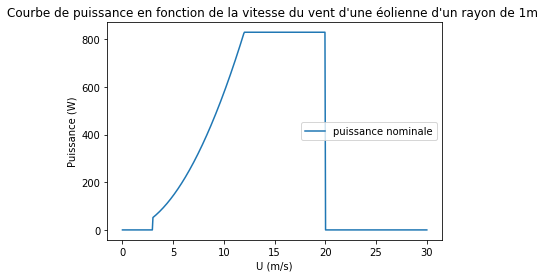

In [ ]:
vitesse_vent3 = np.linspace(0, 30, 500) 

cut_in_speed = 3
cut_speed = 12
cut_out_speed = 20
puissances3 = []
longueur_pale = 1
omega = 150

for v in vitesse_vent3 :
    if v < cut_in_speed:
        puissances3.append(0)
    elif cut_in_speed <= v < cut_speed:
        puissances3.append(puissance_nominale(longueur_pale, omega, v))
    elif cut_speed <= v < cut_out_speed:
        puissances3.append(puissance_nominale(longueur_pale, omega, cut_speed))
    elif v >= cut_out_speed:
        puissances3.append(0)

plt.plot(vitesse_vent3, puissances3, label="puissance nominale")
plt.title("Courbe de puissance en fonction de la vitesse du vent d'une éolienne d'un rayon de 1m ")
plt.xlabel('U (m/s)')
plt.ylabel('Puissance (W)')
plt.legend()
plt.show()

Eolienne d'un rayon de 5m ayant une vitesse angulaire de 30 rad/s

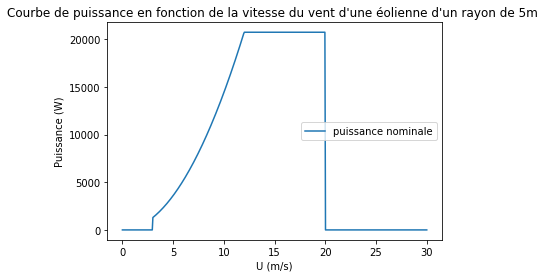

In [ ]:
vitesse_vent4 = np.linspace(0, 30, 500) 

cut_in_speed = 3
cut_speed = 12
cut_out_speed = 20
puissances4 = []
longueur_pale = 5

for v in vitesse_vent4 :
    if v < cut_in_speed:
        puissances4.append(0)
    elif cut_in_speed <= v < cut_speed:
        puissances4.append(puissance_nominale(longueur_pale, 30, v))
    elif cut_speed <= v < cut_out_speed:
        puissances4.append(puissance_nominale(longueur_pale, 30, cut_speed))
    elif v >= cut_out_speed:
        puissances4.append(0)

plt.plot(vitesse_vent4, puissances4, label="puissance nominale")
plt.title("Courbe de puissance en fonction de la vitesse du vent d'une éolienne d'un rayon de 5m ")
plt.xlabel('U (m/s)')
plt.ylabel('Puissance (W)')
plt.legend()
plt.show()

D'après notre modèle numérique, la puissance nominale fournit par une éolienne ayant un rayon compris entre 1m et 5m est comprise entre 1kW et 20kW.

Sachant que la puissance demandée par notre foyer est de 6 kVA, l'éolienne devrait pouvoir alimenter ce foyer en électricité si elle tournait en permanence. Dans la réalité, une éolienne ne fournit pas sa puissance maximale en permanence. De plus, il s'agit ici de la puissance fournit par l'éolienne et non de la puissance récupérable. Pour pouvoir conclure, nous devons calculer la densité de puissance.

<b> Calcul de la densité de puissance </b>

La vitesse du vent suit la densité de probabilité de la loi de Rayleigh :

$$f(x, σ) = \frac{x}{\sigma^2}exp(-\frac{x^2}{2\sigma^2})$$

Ainsi, pour obtenir l'énergie fournit sur une année, il suffit de multiplié la puissance de l'éolienne par la répartition de Rayleigh et par le nombre d'heure en une année.

source :
<a href="https://fr.wikipedia.org/wiki/Loi_de_Rayleigh"> Loi de Rayleigh </a>

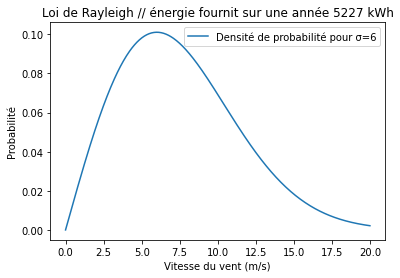

In [ ]:
wind_speed = np.linspace(0, 20, 500)
wind = list(wind_speed)

def Rayleigh(x):
    c = 6
    y = x/c**2 * np.exp(-x**2/(2*c**2))
    return y

puissance_reelle = 0
for i in range(len(puissances4)):
  puissance_reelle += puissances4[i] * Rayleigh(wind[i]) * 365.25 * 24
  i+=1
puissance_reelle = puissance_reelle / len(puissances4)

plt.plot(wind_speed, Rayleigh(wind_speed), label="Densité de probabilité pour σ=6")
plt.xlabel("Vitesse du vent (m/s)")
plt.ylabel("Probabilité")
plt.title("Loi de Rayleigh"+" // "+"énergie fournit sur une année " + str(round(puissance_reelle/1000)) + " kWh")
plt.legend()
plt.show()

<b> <p> La consommation d'une maison par an est comprise entre 5 000 kWh (avec gaz) et 15 000 kWh (tout électrique). Une éolienne ayant des pâles de 5m produit une énergie de 5 227 kWh pendant une année. Ainsi, une éolienne de ce type peut permettre de produire en moyenne la moitié de l'énergie consommée par le foyer français moyen de 10 000 kWh. </p> </b>

<h3> 3 - Les limites de notre modèle numérique </h3>

<ol>
<li> Nous avons considéré que le vent était perpendiculaire à notre pâle ce qui n'est pas toujours le cas </li>
<li> Pour calculer le couple, nous avons considéré que le point d'application de la force se trouvait au centre de la pâle. Or, la surface de la pâle n'étant pas constante, le point d'application est décalé. </li>
<li> Nous avons considéré le flux d'air homogène le long de la pâle ce qui peut être faux pour des grandes éoliennes </li>
<li> Nous ne prenons pas en compte les effets de turbulence et de sillage </li>
<li> Nous avons fixé la masse volumique de l'air, or cette valeur varie selon la température, l'altitude. </li>
</ol>

Sources annexes :

<a href = "https://www.totalenergies.fr/particuliers/parlons-energie/dossiers-energie/energie-renouvelable/connaitre-la-puissance-d-une-eolienne"> Connaitre la puissance d'une éolienne/ totalenergie <a>

<a href = "https://www.edf.fr/groupe-edf/espaces-dedies/l-energie-de-a-a-z/tout-sur-l-energie/produire-de-l-electricite/le-fonctionnement-d-une-eolienne"> Le fonctionnement d'une éolienne / EDF </a>

<a href="http://chimphys.online.fr/templates/mpicptcapteurballon/eolienne.pdf"> Eolienne </a>

<a href="https://www.m-habitat.fr/choisir-son-energie/eolienne/vitesse-d-une-eolienne-domestique-491_A"> Vitesse d'une éolienne domestique </a>

<a href = "https://eolienne.ooreka.fr/astuce/voir/413619/moteur-d-une-eolienne"> Moteur d'une éolienne </a>

<a href = "http://www.michamps4b.be/pedagogie-eolienne-calcul-vitesse.php"> Vitesse des pâles d'une éolienne </a>

<a href = "http://perso.univ-lemans.fr/~fcalvay/mnpm/projet-eolienne.pdf"> Détermination de la zone la plus sollicité sur les pâles d'une éolienne / univ le mans </a>

<a href = "https://www.capitaine-energie.com/fiches-pratiques/consommation-electrique-dun-foyer/#:~:text=La%20consommation%20%C3%A9lectrique%20d%E2%80%99un%20foyer%20en%20France%20On,du%20gaz%2C%20elle%20est%20d%E2%80%99environ%204500%20kWhpar%20an."> Consommation électrique d'un foyer </a>